<a href="https://colab.research.google.com/github/princegod1/A-Tic-tac-toe-game/blob/main/ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Cost: 0.6931471805599453
Iteration 100, Cost: 0.6775981488944716
Iteration 200, Cost: 0.6656957952123845
Iteration 300, Cost: 0.6557837752186826
Iteration 400, Cost: 0.6470372856605603
Iteration 500, Cost: 0.6390422890985505
Iteration 600, Cost: 0.6315874181405637
Iteration 700, Cost: 0.6245615088943642
Iteration 800, Cost: 0.6179031037880669
Iteration 900, Cost: 0.6115755204229667
Iteration 1000, Cost: 0.6055545284434856
Iteration 1100, Cost: 0.5998222580496023
Iteration 1200, Cost: 0.5943641915189728
Iteration 1300, Cost: 0.5891676790186318
Iteration 1400, Cost: 0.5842212063279428
Iteration 1500, Cost: 0.5795140320315441
Iteration 1600, Cost: 0.575036005281491
Iteration 1700, Cost: 0.5707774712096869
Iteration 1800, Cost: 0.5667292185528096
Iteration 1900, Cost: 0.5628824474431711
Iteration 2000, Cost: 0.5592287467753738
Iteration 2100, Cost: 0.5557600761267749
Iteration 2200, Cost: 0.5524687498896506
Iteration 2300, Cost: 0.5493474225469603
Iteration 2400, Cost: 0.54638

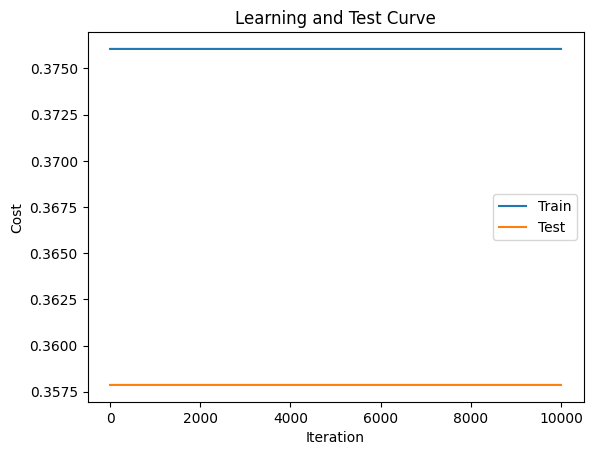

Accuracy: 88.60%


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_strength=0.0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_strength = regularization_strength
        self.weights = None
        self.bias = None
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features, 1))
        self.bias = 0

    def compute_cost(self, y, y_pred):
        m = len(y)
        cost = -1/m * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
        return cost

    def compute_regularization_term(self):
        return (self.regularization_strength / (2 * len(self.weights))) * np.sum(self.weights**2)

    def train(self, X, y):
        m, num_features = X.shape
        self.initialize_parameters(num_features)

        for iteration in range(self.num_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute cost with regularization
            cost = self.compute_cost(y, y_pred) + self.compute_regularization_term()

            # Backward pass
            dz = y_pred - y
            dw = 1/m * np.dot(X.T, dz) + (self.regularization_strength / m) * self.weights
            db = 1/m * np.sum(dz)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store cost for plotting
            self.costs.append(cost)

            # Print cost every 100 iterations
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Cost: {cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)

    def plot_learning_and_test_curve(self, X_train, y_train, X_test, y_test):
        train_costs = []
        test_costs = []

        for iteration in range(self.num_iterations):
            # Forward pass on training set
            z_train = np.dot(X_train, self.weights) + self.bias
            y_pred_train = self.sigmoid(z_train)
            train_costs.append(self.compute_cost(y_train, y_pred_train))

            # Forward pass on test set
            z_test = np.dot(X_test, self.weights) + self.bias
            y_pred_test = self.sigmoid(z_test)
            test_costs.append(self.compute_cost(y_test, y_pred_test))

            # Backward pass and parameter updates (unchanged)

        # Plot both learning and test curves
        plt.plot(range(0, self.num_iterations), train_costs, label='Train')
        plt.plot(range(0, self.num_iterations), test_costs, label='Test')
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.legend()
        plt.title("Learning and Test Curve")
        plt.show()

# Load data from CSV file
# (Assuming your data has columns 'radius_mean', 'texture_mean', and 'diagnosis')
csv_file_path = '/content/cancer_data (1).csv'
df = pd.read_csv(csv_file_path)

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['radius_mean', 'texture_mean']].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, (df['diagnosis'] == 'M').astype(int).values.reshape(-1, 1), test_size=0.2, random_state=42)

# Apply min-max normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Instantiate and train the model
model = LogisticRegression(learning_rate=0.01, num_iterations=10000, regularization_strength=0.1)
model.train(X_train_normalized, y_train)

# Plot learning and test curves
model.plot_learning_and_test_curve(X_train_normalized, y_train, X_test_normalized, y_test)

# Make predictions on new data (test set)
y_pred_test = model.predict(X_test_normalized)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy * 100:.2f}%")






